# **1. Declaration + Initialization**

---



In [168]:
#red, box coordinate (set)
red_cell = set([])
box_cell = set([])

#direction (dict)
direction = {(-1,0):'up', (0,1):'right', (1,0):'down', (0,-1):'left'}

#grid (2D array)
grid = [[0 for j in range(6)] for i in range(4)]

#Path (array)
path = []
path_show = []

#Cell Class
class Cell:
  def __init__(self,coordinate):
    self.coordinate = coordinate
    self.red = False
    self.visited = False
    self.box = False

  def is_red(self):
    return self.red

  def is_box(self):
    return self.box


#Robot Class
class Robot:
  def __init__(self,position, direc):
    self.position = position
    self.direc = direc

  def set_direc(self, direc):
    self.direc = direc

  def move(self):
    global path_show
    path_show.append(robot.position.coordinate)
    self.position = grid[self.position.coordinate[0]+self.direc[0]][self.position.coordinate[1]+self.direc[1]]

#Initialize Grid
for i in range(4):
  for j in range(6):
    grid[i][j] = Cell((i,j))

#Initialize Robot
robot = Robot((grid[3][0]), (-1,0))

# **2. Functions**

---



In [169]:
#1. is_end
#Check whether search is_end
def is_end(grid): return (len(red_cell)==2 and len(box_cell)==2)

#2. in_grid
#Check wheter given cell's coordinate is in grid
def in_grid(coordinate): return ((coordinate[0]>=0 and coordinate[0]<=3) and (coordinate[1]>=0 and coordinate[1]<=5))

#3. update_cell
#Update cell's visited status, box_count, red_count
def update_cell(cell):
  cell.visited=True
  if cell.is_red():
    global red_cell
    red_cell.add(cell.coordinate)

#4. valid_position
#Check whether robot's next position is valid or not
def valid_position(direc):
  next_position = (robot.position.coordinate[0]+direc[0], robot.position.coordinate[1]+direc[1])
  if in_grid(next_position):
    next_cell = grid[next_position[0]][next_position[1]]
    if (not next_cell.is_box()) and (not next_cell.visited):
      return True
    else:
      if (next_cell.is_box()):
        box_cell.add(next_cell.coordinate)
  return False

#5. make_move
#Append the position to 'path' array and move robot to next_position
def make_move(direction):
  global path
  robot.set_direc(direction)
  path.append(robot.position)
  robot.move()

# **3. DFS Algorithm**

---



In [170]:
def DFS():
  global path, direction, red_cell, box_cell
  if is_end(grid):
    print("The search is end")
    print("The coordinate of red cell : ",red_cell, " box cell : ", box_cell)
    return

  else:
    update_cell(robot.position)
    print(robot.position.coordinate, end=' -> ')

    if valid_position((-1,0)): #up
      make_move((-1,0))
      DFS()
    elif valid_position((0,1)): #right
      make_move((0,1))
      DFS()
    elif valid_position((1,0)): #down
      make_move((1,0))
      DFS()
    elif valid_position((0,-1)): #left
      make_move((0,-1))
      DFS()
    else:
      print("Stucked")
      new_direc = (path[-1].coordinate[0]-robot.position.coordinate[0], path[-1].coordinate[1]-robot.position.coordinate[1])
      robot.set_direc(new_direc)
      path.pop()
      robot.move()
      DFS()


# **4. Test (Enter the coordinate of box, red cell)**

---



In [171]:
#Enter the coordinate of box cell
grid[1][0].box=True
grid[2][1].box=True
#Enter the coordinate of red cell
grid[3][0].red=True
grid[1][4].red=True
DFS()

(3, 0) -> (2, 0) -> Stucked
(3, 0) -> (3, 1) -> (3, 2) -> (2, 2) -> (1, 2) -> (0, 2) -> (0, 3) -> (0, 4) -> (0, 5) -> (1, 5) -> (2, 5) -> (3, 5) -> (3, 4) -> (2, 4) -> (1, 4) -> The search is end
The coordinate of red cell :  {(1, 4), (3, 0)}  box cell :  {(1, 0), (2, 1)}


# **5. Visualization**

---



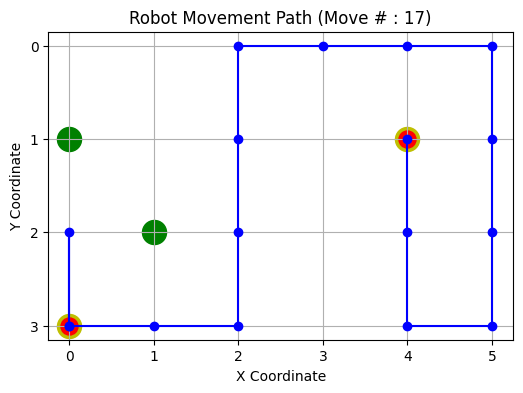

In [172]:
from matplotlib import pyplot as plt

def plot_robot_path(path_show):
    # 이동 경로의 좌표 추출
    x_coords = [pos[1] for pos in path_show]
    y_coords = [pos[0] for pos in path_show]

    # 이동 경로 표시
    plt.figure(figsize=(6, 4))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', label='Path')

    # 시작, 끝 점 표시
    plt.scatter(x_coords[0], y_coords[0], color='y', s=300, label='Start')
    plt.scatter(x_coords[-1], y_coords[-1], color='y', s=300, label='End')

    # box_cell, red_cell 표시
    for i in range(4):
      for j in range(6):
        if grid[i][j].box:
          plt.scatter(j, i, color='g', s=300, label='Box')
        elif grid[i][j].red:
          plt.scatter(j, i, color='r', s=150, label='Red')

    # 그래프 설정
    move_num = len(path_show)
    plt.gca().invert_yaxis()  # 좌표계를 맞추기 위해 Y축 반전
    plt.xticks(range(6))
    plt.yticks(range(4))
    plt.grid(True)
    plt.title(f"Robot Movement Path (Move # : {len(path_show)})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.show()

plot_robot_path(path_show)